In [9]:
#task 1  (Basic Data Handling)

In [2]:
import pandas as pd
df=pd.read_csv("heart2.csv.data")
df.head()

,40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0
0,49 0 3 160 180 0 0 156 0 1 2 -9 -9 1
1,37 1 2 130 283 0 1 98 0 0 -9 -9 -9 0
2,48 0 4 138 214 0 0 108 1 1.5 2 -9 -9 3
3,54 1 3 150 -9 0 0 122 0 0 -9 -9 -9 0
4,39 1 3 120 339 0 0 170 0 0 -9 -9 -9 0


In [27]:
import numpy as np
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("\nTarget (binary) distribution:")
print(df['target'].value_counts())



Target (binary) distribution:
target
1    115
0      8
Name: count, dtype: int64


In [7]:
#task 2  (Simple Visualization)

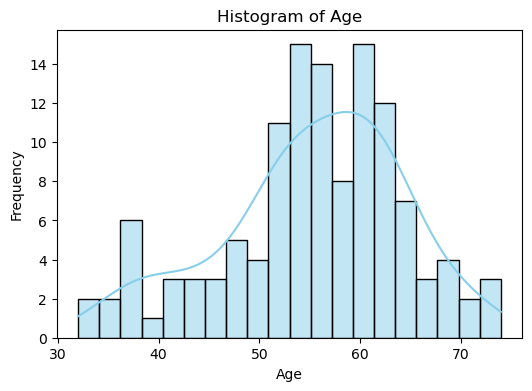

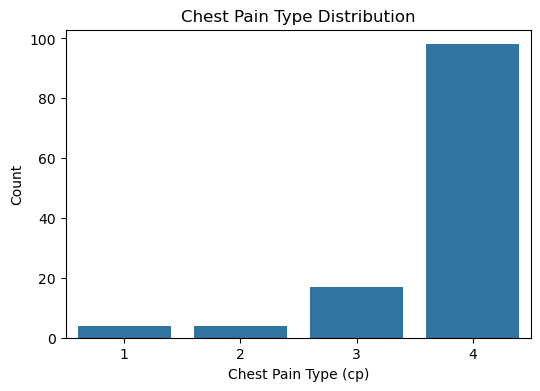

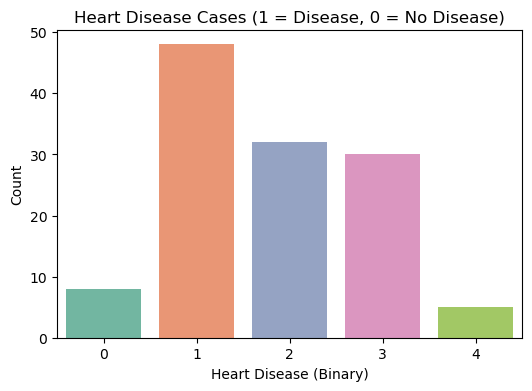

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# 1. Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Bar chart of Chest Pain Type (cp)
plt.figure(figsize=(6,4))
sns.countplot(x='cp', data=df)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.show()

# 3. Bar chart of Heart Disease Cases 
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, hue='target', palette="Set2", legend=False)
plt.title("Heart Disease Cases (1 = Disease, 0 = No Disease)")
plt.xlabel("Heart Disease (Binary)")
plt.ylabel("Count")
plt.show()


In [10]:
#task 3  (Preprocessing the Data)

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check for mising values
df.fillna(df.median(numeric_only=True), inplace=True)
for col in ["cp","restecg","slope","thal"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Split features (X) and target (y)
df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
X = df.drop(columns=["target", "target_binary"])  # keep only features
y = df["target_binary"]

# 3. Convert categorical columns into numeric format
X = pd.get_dummies(X, columns=["cp","restecg","slope","thal"], drop_first=True)

# 4. Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)


Shape of training data: (98, 18)
Shape of test data: (25, 18)


In [13]:
#task 4  (Classification Model)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Train Decision Tree Classifier (default parameters)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = clf.predict(X_test)

# 4. Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.84


In [16]:
#task 5  (Evaluation)

In [28]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("In the medical context of heart disease, recall is more important because missing a true patient (false negative) can be life-threatening. It is safer to flag someone incorrectly (false positive) than to miss diagnosing a real patient.")

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.91      0.91      0.91        23

    accuracy                           0.84        25
   macro avg       0.46      0.46      0.46        25
weighted avg       0.84      0.84      0.84        25

In the medical context of heart disease, recall is more important because missing a true patient (false negative) can be life-threatening. It is safer to flag someone incorrectly (false positive) than to miss diagnosing a real patient.


In [19]:
#task 6  (Short Reflection)

In [20]:
print("The easiest preprocessing step for me was handling missing values because filling them was simple. The most confusing step was encoding since I had to use pd.get_dummies() and remember which columns to convert. Scaling was also a bit tricky at first, but I understood it after practice. The Decision Tree worked well and gave a good accuracy on the test set. I think recall is more important than accuracy here because missing a heart disease patient can be dangerous. This task helped me understand why preprocessing and evaluation are important in machine learning.")

The easiest preprocessing step for me was handling missing values because filling them was simple. The most confusing step was encoding since I had to use pd.get_dummies() and remember which columns to convert. Scaling was also a bit tricky at first, but I understood it after practice. The Decision Tree worked well and gave a good accuracy on the test set. I think recall is more important than accuracy here because missing a heart disease patient can be dangerous. This task helped me understand why preprocessing and evaluation are important in machine learning.
